<a href="https://colab.research.google.com/github/NarciSource/Aivle--MiniProject-4-2/blob/master/1.%20%EB%AC%B8%EC%9D%98%20%EB%82%B4%EC%9A%A9%20%EC%9C%A0%ED%98%95%20%EB%B6%84%EB%A5%98_%EB%B6%84%EC%84%9D_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%97%90%EC%9D%B4%EB%B8%94%EB%9F%AC_jbk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

### 1-1. 라이브러리 설치

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 8.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=58d04e92a1e2b0ecbe018a7f9112eda8d1d3d770f41dfae6a88a153ed65c5172
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# 런타임 재시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,919 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and dire

### 1-2. 라이브러리 import

In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

In [ ]:
import tensorflow as tf

### 1-3. 한글 글꼴 설정

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/aivle/mp4_2/train.csv')
df.shape

(3706, 2)

In [ ]:
df_grammer = pd.read_csv('/content/drive/MyDrive/aivle/mp4_2/df_grammer.csv')
df.loc[df_grammer['text'].isna(),'text'].map(len)

27      1237
73      1188
93       835
97      1122
103      858
        ... 
3583     897
3589    1163
3625     661
3629    1286
3703     915
Name: text, Length: 170, dtype: int64

In [ ]:
df_grammer.fillna('', inplace=True)

In [ ]:
df = df_grammer
df.shape

(3706, 2)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
df.head()

,text,label
0,selfconvs1 nnModuleListnnConv2d1 Co K 100 for...,코드2
1,현재 이미지를 여러 개 업로드하기 위해 자바스크립트로 동적으로 폼 여러 개 생성하는...,웹
2,globglobPATH를 사용할 때 질문입니다 PATH에 가 포함되면 제대로 작...,코드2
3,tmpp tmpgroupbyby Addr1 asindexFalseCategory...,코드2
4,filename TESTIMAGE strroundframesec jpg 이렇게...,코드2


## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
df['text'].str.len().describe()

count    3706.000000
mean      128.875337
std       100.353648
min         0.000000
25%        57.000000
50%       101.000000
75%       175.000000
max       525.000000
Name: text, dtype: float64

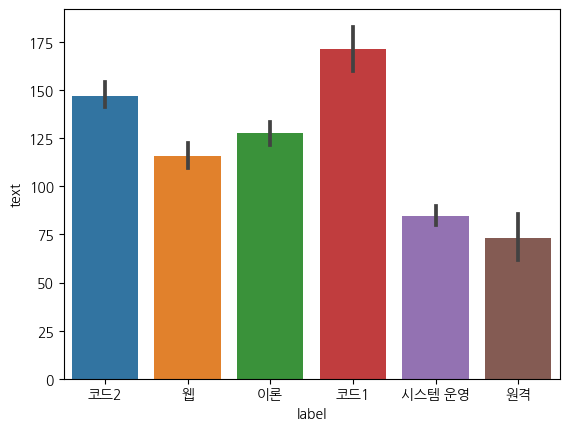

In [ ]:
sns.barplot(y=df['text'].str.len(), x=df['label'])
plt.show()

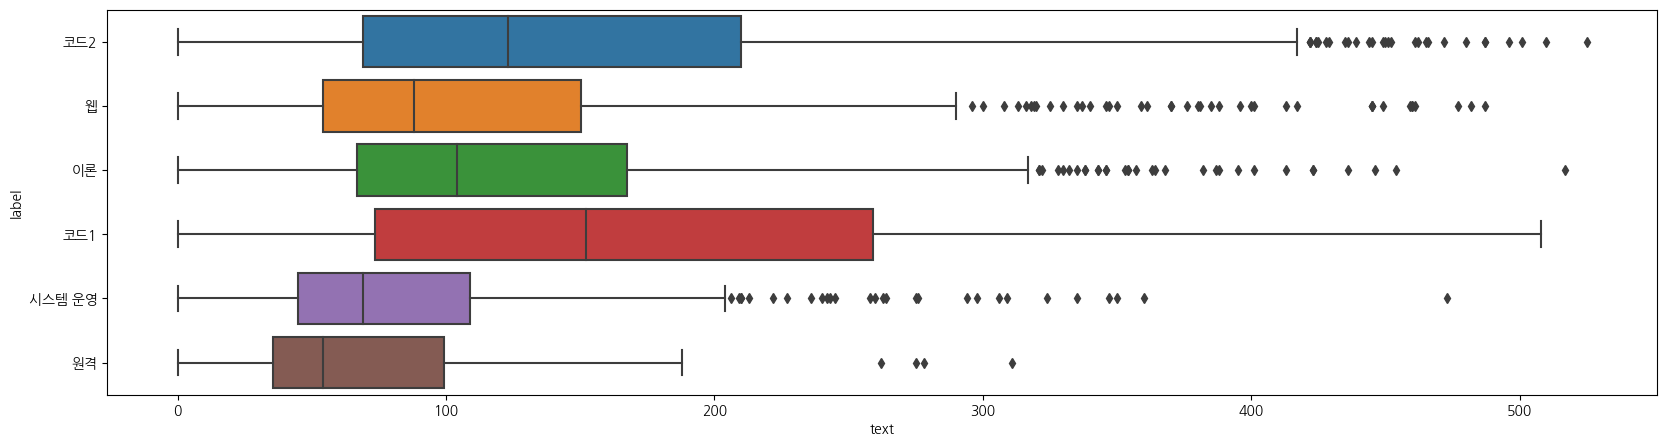

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['text'].str.len(), y=df['label'])
plt.show()

In [ ]:
print(df['text'].map(len).argmin(), df.loc[df['text'].map(len).argmin(), 'text'])
print(df['text'].map(len).argmax(), df.loc[df['text'].map(len).argmax(), 'text'])

27 
2989 안녕하세요 서울시 대중교통 기반에서 강사님이 말씀하신 11 데이터 불러오기 파일이 없는데 조치 부탁드립니다 다른 분들 폴더에는 있는데 제 파일에는 없어요 아래는 지금 제 목록에 있는 리스트입니다				ipynbcheckpoints202208161029460 Tutorialipynb 미리 보기 복사 13 KB	2022081610314413 seoulpeoplecsv 미리 보기 복사 26 KB	2022081215405712 seoulmovingmonth4csv 미리 보기 복사 13 GB	20220812154100111 busstation321 KB	2022081610522611 busstationcsv 미리 보기 복사 321 KB	202208121540570 Tutorialpy 미리 보기 복사 70 KB	2022081610314511 BUSSTATIONBOARDINGMONTH202204csv 미리 보기 복사 107 MB	2022081215405814 businesstypecsv 미리 보기 복사 40 KB	20220812154057


### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.

In [ ]:
from konlpy.tag import Okt
import time

* 2개 이상의 형태소 분석기를 Time analysis 해보기

In [ ]:
okt = Okt()
mecab = MeCab()

extraction = lambda parser,tag : list(map(getattr(parser, tag), df.loc[:,'text']))

okt_nouns = None
mecab_nouns = None
okt_pos = None
mecab_pos = None

time_okt_nouns = %timeit -o okt_nouns = extraction(okt, 'nouns')
time_mecab_nouns = %timeit -o mecab_nouns = extraction(mecab, 'nouns')
time_okt_pos = %timeit -o okt_pos = extraction(okt, 'pos')
time_mecab_pos = %timeit -o mecab_pos = extraction(mecab, 'pos')

In [ ]:
okt_nouns = extraction(okt, 'nouns')
mecab_nouns = extraction(mecab, 'nouns')
okt_pos = extraction(okt, 'pos')
mecab_pos = extraction(mecab, 'pos')

In [ ]:
from itertools import starmap
arr = list(starmap(lambda num,time: (num,time,'okt nouns'), enumerate(time_okt_nouns.all_runs))) +\
    list(starmap(lambda num,time: (num,time,'mecab nouns'), enumerate(time_mecab_nouns.all_runs)))+\
    list(starmap(lambda num,time: (num,time,'okt pos'), enumerate(time_okt_pos.all_runs)))+\
    list(starmap(lambda num,time: (num,time,'mecab pos'), enumerate(time_mecab_pos.all_runs)))
df_time = pd.DataFrame(data=arr, columns=['num','time','tag'])
df_time.head()

In [ ]:
sns.lineplot(data=df, x='num', y='time', hue='tag')
plt.show()

In [ ]:
df_time = pd.DataFrame(data=[['okt', 'nouns', time_okt_nouns.average],
                             ['mecab', 'nouns', time_mecab_nouns.average],
                             ['okt', 'pos', time_okt_pos.average],
                             ['mecab', 'pos', time_mecab_pos.average],
                             ], columns=['parser','tag','time'])
df_time

In [ ]:
sns.barplot(data=df_time, y='time', x='tag', hue='parser')
plt.title("평균시간")
plt.show()

* Number of Samples / Number of words per sample 구해보기

In [ ]:
number_of_words_per_sample = df['text'].str.split().map(len)
print('Number of Samples', len(number_of_words_per_sample))
print('Number of words per sample:', np.mean(number_of_words_per_sample))
print('Number of Samples / Number of words per sample', int(len(number_of_words_per_sample)/np.mean(number_of_words_per_sample)))

112 < 1500 이므로 multi-layer perceptrons that take n-grams 선택

https://developers.google.com/machine-learning/guides/text-classification/step-2-5?hl=ko

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

* nltk Text 변환

In [ ]:
import nltk
nltk.download('punkt')

df_nltk = pd.DataFrame(data=list(map(nltk.Text, okt_nouns)), columns=['text'])
df_nltk['vocab'] = df_nltk['text'].apply(lambda text: text.vocab())
df_nltk['label'] = df['label']
df_nltk

* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기

In [ ]:
df_nltk['TTR'] = df_nltk[['vocab','text']].apply(lambda x: 0 if len(x[1])==0 else len(x[0])/len(x[1]), axis=1)
df_nltk

In [ ]:
sns.boxplot(data=df_nltk, x='TTR')
plt.show()

* 각각 Frequency 확인 및 분포 시각화

In [ ]:
for text in df_nltk.loc[:3,'text']:
    text.plot()

* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기

In [ ]:
def analys_interested_word(word):
    return len(df_nltk.loc[df_nltk['vocab'].apply(lambda vocab: vocab.freq(word)>0)])/len(df_nltk) *100

In [ ]:
print("코드", analys_interested_word('코드'))
print("웹", analys_interested_word('웹'))
print("이론", analys_interested_word('이론'))
print("원격", analys_interested_word('원격'))
print("시스템", analys_interested_word('시스템'))

In [ ]:
!pip install ktextaug
!pip install mecab-python3

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

* collocations

In [ ]:
from nltk.collocations import *

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
finder = BigramCollocationFinder.from_words(df_nltk['text'][0])
finder.nbest(bigram_measures.pmi, 10)

df_nltk['text'].apply(lambda text: BigramCollocationFinder.from_words(text).nbest(bigram_measures.pmi, 10))

* 최소 길이 문의 내용에 대해 grammar pasing 해보기

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

In [ ]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

In [ ]:
min_text = df_train.loc[df_train['text'].map(len).argmin(), 'text']
tagged = nltk.pos_tag(nltk.word_tokenize(min_text))
parser = nltk.RegexpParser(grammar)
parser.parse(tagged).pprint()
parser.parse(tagged)

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(max_font_size=200, max_words=20, background_color="white",
               relative_scaling=.2,
               width=700, height=600,
               font_path=FONT_PATH)

for text in df_nltk['text'][50:53]:
    wc.generate_from_frequencies(text.vocab())
    plt.imshow(wc)
    plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
import itertools

wc = WordCloud(max_font_size=200, max_words=40, background_color="white",
               relative_scaling=.2,
               width=700, height=600,
               font_path=FONT_PATH)

bigram_measures = nltk.collocations.BigramAssocMeasures()

def text_analysis(df, label=None):
    string = list(itertools.chain(*df.loc[df['label']==label,'text']))
    text = nltk.Text(string)
    vocab = text.vocab()

    finder = BigramCollocationFinder.from_words(text)
    finder.nbest(bigram_measures.pmi, 10)

    print("collocations", BigramCollocationFinder.from_words(text).nbest(bigram_measures.pmi, 10))

    wc.generate_from_frequencies(vocab)
    plt.imshow(wc)
    plt.show()
"""
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화
    """

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(df_nltk.label.unique()):
    text_analysis(df_nltk,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

### 5-2. Train Validation split

In [ ]:
df.loc[df['label'].isin(['코드1', '코드2']),'label'] = '코드'

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=True)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.shape, df_test.shape

((2594, 2), (1112, 2))

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [ ]:
stop_words_url = "https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt"

In [ ]:
import requests
response = requests.get(stop_words_url)
stop_words = response.text.split('\n')

In [ ]:
import re

def clearing(df):
    df['text'] = df['text'].apply(lambda text: re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", " ", text).replace('\n',' '))
    #df['token'] = df['text'].apply(lambda text: [word for word, tag in okt.pos(text) if tag in ['Noun', 'Alpha']])
    #df['token'] = df['text'].apply(lambda text: [word for word, tag in mecab.pos(text) if tag in ['NNG', 'NNP','SL']])
    #df['token'] = df['text'].apply(lambda text: list(map('/'.join ,mecab.pos(text))))

    #df['token'] = df['token'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
    return df

In [ ]:
df_train = clearing(df_train)
df_test = clearing(df_test)
df_train.tail()

,text,label
2589,아까전에 Unable to connect to the server x509 에러...,웹
2590,실습 02 02 타이타닉 x y분리과정에서 다음과 같은 오류가 발생합니다 위에...,코드
2591,실습 내용중에 REPORTED SATISFACTION 값이 STR이다보니 Si...,코드
2592,layer 추가에서 concat 하는 경우 강사님은 각각 2개의 레이어를 add ...,이론
2593,모델 학습 시 validation split을 주게 되면 이 검증 데이터에서의 lo...,이론


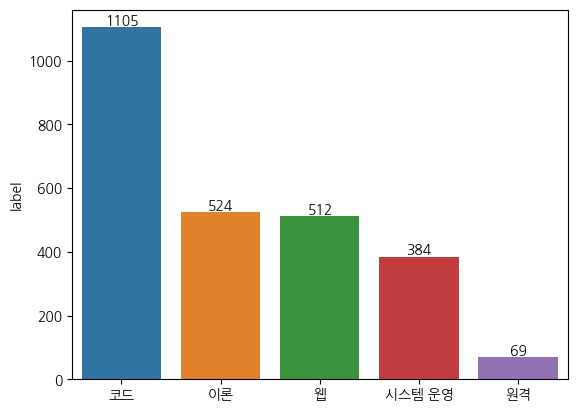

In [ ]:
vc = df_train['label'].value_counts()
ax = sns.barplot(y=vc, x=vc.index)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df_eng = df_train[:]
df_eng['text'] = df_eng['text'].apply(lambda text: ' '.join(re.findall(r"[a-zA-Z]+", text)).strip())
df_eng = df_eng.loc[df_eng['text'].apply(lambda text: text!='')]
df_eng.head()

,text,label
0,p get dynamodb table,웹
1,n intinputa listmapint inputsplit for in range...,코드
2,invalid literal for int with base num intinput...,코드
4,F modelpredict F validationgeneratorclasses to...,코드
5,Enter print print print Enter print print prin...,코드


In [ ]:
df_eng['text']

0                                    p get dynamodb table
1       n intinputa listmapint inputsplit for in range...
2       invalid literal for int with base num intinput...
4       F modelpredict F validationgeneratorclasses to...
5       Enter print print print Enter print print prin...
                              ...                        
2588                                         dftotalshape
2589                            modelfit xtrainytrain fit
2590                         Application is not available
2592                   trainy shift trainx shift training
2593                                        values values
Name: text, Length: 1842, dtype: object

In [ ]:
df_kor = df_train[:]
df_kor['text'] = df_kor['text'].apply(lambda text: re.sub(r"[a-zA-Z0-9]+", ' ', text).strip())
df_kor = df_kor.loc[df_kor['text'].apply(lambda text: text!='')]
df_kor.head()

,text,label
0,안녕하세요 다름이 아니라 다음 주 월요일에 있을 재시험 대비 특강 도강의 영상을 따...,시스템 운영
1,원격 지원 잘못된 번호라고 뜨고 접속이 안됩니다,원격
4,본 데이터의 생활인구수는 한국인인가요 한국인 외국인인가요 만 나이 기준인가요 감...,이론
5,그동안은 강사님께서 직접 을 코드로 작성하여서 하셨는데 이번에는 의 를 이...,코드
6,각 문제 별로 실행 속도에 따라 순위가 매겨지는데 전체 랭크에 큰 영향이 있는 부...,시스템 운영


In [ ]:
df_train = pd.concat([df_train, df_kor], axis=0)

### 증강


In [ ]:
!pip install ktextaug
!pip install mecab-python3

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
from ktextaug.tokenization_utils import Tokenizer
from ktextaug import random_swap, TextAugmentation
from random import Random
from konlpy.tag import Mecab

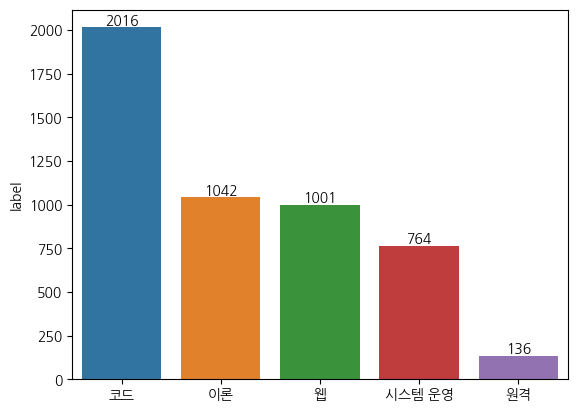

In [ ]:
vc = df_train['label'].value_counts()
ax = sns.barplot(y=vc, x=vc.index)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
aug_rate = 2
needs_rate = (df_train['label'].value_counts().max()*aug_rate/df_train['label'].value_counts()-1).astype(int)
needs_rate

코드         1
웹          3
이론         3
시스템 운영     4
원격        29
Name: label, dtype: int64

In [ ]:
needs_rate * df_train['label'].value_counts()

코드        1112
웹         1536
이론        1527
시스템 운영    1548
원격        2146
Name: label, dtype: int64

In [ ]:
df_train = df_train.loc[df_train['text'].apply(len) > 0]

In [ ]:
mecab=Mecab()
agent = TextAugmentation(tokenizer=Tokenizer("mecab"))
augment = lambda label: pd.DataFrame({
            'text': sum([agent.generate(
                            df_train.loc[df_train['label']==label,'text'].tolist(),
                            mode='random_swap',
                            rng=Random(t),
                            n_swaps=2,
                        ) for t in range(needs_rate[label])],[]),
            'label': label})

df_train_e = pd.concat([df_train, *map(augment,['코드','웹','이론','시스템 운영','원격'])], axis=0)
df_train_e

  0%|          | 0/1112 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

,text,label
0,01 php 할 때 까지만 해도 비밀번호가 잘 되다가 갑자기 저런 오류가 뜨더니 안...,웹
1,3 불필요한 열 제거 시도 구군 증가액 증가율 열만 추출하여 a...,코드
2,안녕하세요 실습파일 실습05 04 GridSearch 결정트리 Mobile 관...,코드
3,복사붙여넣기하면서 비교연산자 내용이 빠져서 다시 제출합니다 def wat...,코드
4,coding utf 8 import sys sgh list ...,코드
...,...,...
2141,port 22 Connection timed out 오류 해결 을 법 모르 겠 습니...,원격
2142,key ppk 파일 아무리 이 보이 아도 찾 지 않 는데 혹시 원격 지원 부탁 드려...,원격
2143,안녕 하 세요 지원 하 결석 으로 requirements txt 사용 과 추가 패키...,원격
2144,안녕 하 세요 원격 자체 의 DB 서브 넷 그룹 과 85 p 의 가용 영역 칸 p ...,원격


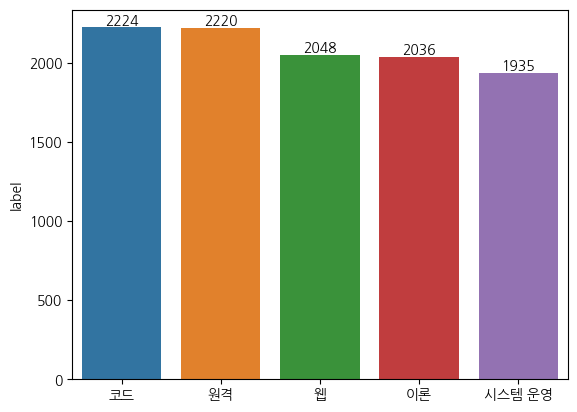

In [ ]:
vc = df_train_e['label'].value_counts()
ax = sns.barplot(y=vc, x=vc.index)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
label_dict = {
    '코드': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

x_train_e = df_train_e['text']
x_train = df_train['text']
x_test = df_test['text']

y_train_e = df_train_e['label'].map(label_dict)
y_train = df_train['label'].map(label_dict)
y_test = df_test['label'].map(label_dict)

In [ ]:
x_train.shape, y_train.shape

((2594,), (2594,))

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

#### Test

* 증강 안함

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer(tokenizer=mecab.morphs,
                        #max_features = 1000,
                        stop_words= stop_words,
                        ngram_range = (1,2),
                        )
x_train_tfidf = tfidv.fit_transform(x_train)
x_test_tfidf = tfidv.transform(x_test)
print(x_train_tfidf.shape, x_test_tfidf.shape)

(2594, 67408) (1112, 67408)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model_lr = LogisticRegression()
model_lr.fit(x_train_tfidf, y_train)
print("Score:",model_lr.score(x_test_tfidf, y_test))
print(classification_report(y_test, model_lr.predict(x_test_tfidf)))

Score: 0.8075539568345323
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       473
           1       0.93      0.70      0.80       220
           2       0.74      0.71      0.72       219
           3       0.94      0.76      0.84       174
           4       0.94      0.58      0.71        26

    accuracy                           0.81      1112
   macro avg       0.86      0.74      0.78      1112
weighted avg       0.82      0.81      0.81      1112



* 증강

In [ ]:
tfidv = TfidfVectorizer(tokenizer=mecab.morphs,
                        #max_features = 1000,
                        stop_words= stop_words,
                        ngram_range = (1,2),
                        )
x_train_e_tfidf = tfidv.fit_transform(x_train_e)
x_test_e_tfidf = tfidv.transform(x_test)
print(x_train_e_tfidf.shape, x_test_e_tfidf.shape)

(10463, 98681) (1112, 98681)


In [ ]:
model_lr.fit(x_train_e_tfidf, y_train_e)
print("Score:",model_lr.score(x_test_e_tfidf, y_test))
print(classification_report(y_test, model_lr.predict(x_test_e_tfidf)))

Score: 0.8327338129496403
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       473
           1       0.86      0.86      0.86       220
           2       0.69      0.80      0.74       219
           3       0.88      0.83      0.85       174
           4       0.83      0.92      0.87        26

    accuracy                           0.83      1112
   macro avg       0.83      0.85      0.84      1112
weighted avg       0.84      0.83      0.83      1112



### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    analyzer= mecab.morphs,
)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

print(len(tokenizer.word_index))
print(tokenizer.word_index)

* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.

In [ ]:
sentent_lens = list(map(len,sequence_train))
plt.figure(figsize=(20,2))
sns.boxplot(x=sentent_lens)
plt.show()
plt.figure(figsize=(20,2))
sns.histplot(x=sentent_lens)
plt.show()
pd.Series(sentent_lens).describe()

In [ ]:
selected_sequence_length = 8

In [ ]:
x_train_s = tf.keras.utils.pad_sequences(sequence_train,
                                         maxlen=selected_sequence_length,
                                         padding='post')
x_test_s = tf.keras.utils.pad_sequences(sequence_test,
                                        maxlen=selected_sequence_length,
                                        padding='post')
y_train_s = df_train['label']
y_test_s = df_test['label']

print(x_train_s.shape, x_test_s.shape, y_train_s.shape, y_test_s.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train_s, y_train_s)
model_lr.score(x_test_s, y_test_s)

### 6-4. Word2Vec (gensim, optional)
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
!pip install gensim

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다.
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다.
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])

    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다.
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다.
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다.
    sent_embedding_vectors = np.stack(dataset)

    return sent_embedding_vectors

In [ ]:
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
vector_size = 300

model_w2v = Word2Vec(df['text'], vector_size=vector_size, min_count=40, window=10, sample=1e-3)
test_data_vecs = get_dataset(df['text'], model_w2v, vector_size)

x_train_w2v, x_test_w2v, y_train_w2v, y_test_w2v = train_test_split(test_data_vecs, df['label'], test_size=.3)

print(x_train_w2v.shape, x_test_w2v.shape, y_train_w2v.shape, y_test_w2v.shape)

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
df_shape = pd.DataFrame(data={
                        'tfidf': [x_train_tfidf.shape, x_test_tfidf.shape, y_train.shape, y_test.shape],
                        'tfidf_e': [x_train_e_tfidf.shape, x_test_e_tfidf.shape, y_train_e.shape, y_test.shape],
                        #'sequence': [x_train_s.shape, x_test_s.shape, y_train.shape, y_test.shape],
                        #'w2v': [x_train_w2v.shape, x_test_w2v.shape, y_train_w2v.shape, y_test_w2v.shape]
                        },
                        index=['x_train','x_test','y_train','y_test'])
df_shape.T

,x_train,x_test,y_train,y_test
tfidf,"(2594, 67408)","(1112, 67408)","(2594,)","(1112,)"
tfidf_e,"(10463, 98681)","(1112, 98681)","(10463,)","(1112,)"


In [ ]:
type(y_train_e)

In [ ]:
from scipy.sparse import save_npz, load_npz, csc_matrix
save_npz('/content/drive/MyDrive/aivle/mp4_2/x_train_tfidf.npz', x_train_tfidf)
save_npz('/content/drive/MyDrive/aivle/mp4_2/x_test_tfidf.npz', x_test_tfidf)
y_train.to_csv('/content/drive/MyDrive/aivle/mp4_2/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/aivle/mp4_2/y_test.csv', index=False)

save_npz('/content/drive/MyDrive/aivle/mp4_2/x_train_e_tfidf.npz', x_train_e_tfidf)
save_npz('/content/drive/MyDrive/aivle/mp4_2/x_test_e_tfidf.npz', x_test_e_tfidf)
y_train_e.to_csv('/content/drive/MyDrive/aivle/mp4_2/y_train_e.csv', index=False)
